In [1]:
import sys; sys.path.append('..')
import random
import pyzx as zx
%config InlineBackend.figure_format = 'svg'

In [19]:
g0 = zx.generate.cliffords(4,100)
zx.d3.draw(g0)

In [20]:
zx.simplify.clifford_simp(g0)

spider_simp: 38. 21. 11. 6. 4.  5 iterations
id_simp: 15. 2.  2 iterations
spider_simp: 19. 7. 4. 2.  4 iterations
pivot_simp: 10. 5. 1.  3 iterations
lcomp_simp: 18. 7. 3. 4. 3. 2. 1. 1. 2. 1.  10 iterations


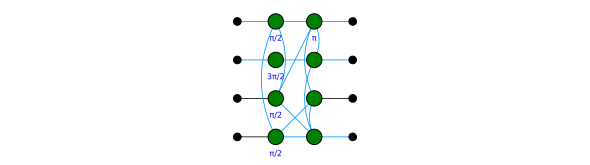

In [22]:
g0.normalise()
zx.draw(g0)

In [27]:
g1 = zx.generate.cliffords(10,100000)
zx.simplify.clifford_simp(g1)

spider_simp: 36614. 22504. 12235. 5796. 2136. 573. 74. 4. 1.  9 iterations
id_simp: 12793. 1554. 21.  3 iterations
spider_simp: 13491. 6846. 2767. 737. 141. 18.  6 iterations
pivot_simp: 9641. 3517. 1419. 564. 209. 49. 12. 2.  8 iterations
lcomp_simp: 18640. 6902. 4313. 2952. 2226. 1746. 1412. 1225. 998. 860. 743. 647. 577. 525. 467. 422. 380. 350. 315. 307. 263. 243. 229. 202. 189. 182. 171. 171. 159. 158. 143. 143. 135. 134. 129. 129. 108. 110. 112. 100. 89. 85. 79. 74. 65. 65. 64. 63. 54. 57. 59. 44. 37. 39. 49. 38. 33. 36. 31. 27. 27. 29. 22. 22. 20. 19. 20. 22. 25. 16. 17. 19. 16. 16. 13. 13. 15. 12. 14. 12. 9. 9. 10. 7. 10. 6. 11. 9. 7. 8. 7. 7. 7. 5. 5. 5. 5. 6. 5. 4. 4. 5. 4. 5. 5. 4. 4. 4. 4. 3. 3. 4. 3. 3. 4. 1. 2. 1.  118 iterations


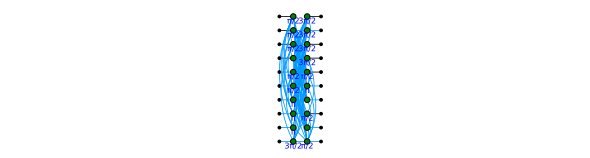

In [28]:
g1.normalise()
zx.draw(g1)

In [2]:
random.seed(1344) # Make sure the same circuit is generated
g = zx.generate.cliffordT(4,350,p_t=0.01) # Generate the circuit as a ZX-diagram
c = zx.Circuit.from_graph(g) # Convert it to a sequence-of-gates representation
print(c.stats())

Circuit  on 4 qubits with 350 gates.
        4 is the T-count
        346 Cliffords among which 
        109 2-qubit gates and 0 Hadamard gates.


In [3]:
c2 = zx.optimize.basic_optimization(c.split_phase_gates())
print(c2.stats())

Circuit  on 4 qubits with 195 gates.
        4 is the T-count
        191 Cliffords among which 
        86 2-qubit gates and 43 Hadamard gates.


In [4]:
g = c2.to_graph()
zx.d3.draw(g)

Now we simplify our circuit

In [5]:
zx.simplify.clifford_simp(g) # This does the simplification routine from the paper
g.normalise() # This simply puts the circuit in a more compact format, that allows easy visualisation
zx.d3.draw(g)

spider_simp: 58. 37. 15. 12. 4. 1.  6 iterations
id_simp: 1.  1 iterations
spider_simp: 8. 1.  2 iterations
pivot_simp: 15. 6. 2. 2.  4 iterations
lcomp_simp: 33. 12. 11. 6. 6. 4. 4. 4. 3. 1. 1. 1. 1.  13 iterations


Finally we extract a circuit from this diagram.

In [6]:
c = zx.extract.streaming_extract(g.copy())
print(c.to_basic_gates().stats())
zx.d3.draw(c.to_graph())

Circuit  on 4 qubits with 41 gates.
        4 is the T-count
        37 Cliffords among which 
        21 2-qubit gates and 12 Hadamard gates.
